**INTRODUCTION A LA REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
contingency_table=pd.crosstab(df["GarageQual"],df["GarageCars"])
contingency_table

GarageCars,1,2,3,4
GarageQual,,,,
Ex,2,0,1,0
Fa,33,13,2,0
Gd,2,12,0,0
Po,3,0,0,0
TA,329,799,178,5


In [ ]:
chi2,_,_,_=stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

# Print the Cramér's V statistic
print(f"Cramér's V between GarageCars and GarageQual: {cramers_v}")

Cramér's V between GarageCars and GarageQual: 0.12262972553830867


In [ ]:
corr_df = df.select_dtypes(exclude="object").drop(columns=['Id','MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MiscVal','PoolArea','MoSold']).corr()

In [ ]:
for column in corr_df.columns:
  print(corr_df.loc[corr_df[column]>.5, column])

LotFrontage    1.0
Name: LotFrontage, dtype: float64
LotArea    1.0
Name: LotArea, dtype: float64
YearBuilt       1.000000
YearRemodAdd    0.592855
GarageYrBlt     0.825667
SalePrice       0.522897
Name: YearBuilt, dtype: float64
YearBuilt       0.592855
YearRemodAdd    1.000000
GarageYrBlt     0.642277
SalePrice       0.507101
Name: YearRemodAdd, dtype: float64
MasVnrArea    1.0
Name: MasVnrArea, dtype: float64
BsmtFinSF1     1.000000
TotalBsmtSF    0.522396
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2    1.0
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF    1.0
Name: BsmtUnfSF, dtype: float64
BsmtFinSF1     0.522396
TotalBsmtSF    1.000000
1stFlrSF       0.819530
SalePrice      0.613581
Name: TotalBsmtSF, dtype: float64
TotalBsmtSF    0.819530
1stFlrSF       1.000000
GrLivArea      0.566024
SalePrice      0.605852
Name: 1stFlrSF, dtype: float64
2ndFlrSF     1.000000
GrLivArea    0.687501
Name: 2ndFlrSF, dtype: float64
LowQualFinSF    1.0
Name: LowQualFinSF, dtype: float64
1stFlrSF     0.5

In [ ]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
df["SalePrice"].mean()

180921.19589041095

In [ ]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.isnull().sum().sum()

6965

In [ ]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100



5.889565364451209

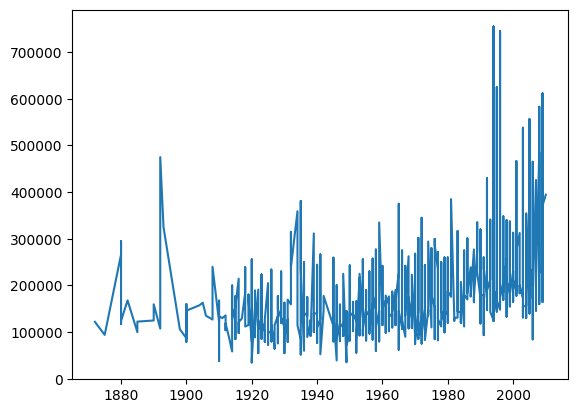

In [ ]:
df.sort_values(by='YearBuilt', inplace=True)
plt.plot(df['YearBuilt'],df['SalePrice'])

In [ ]:
df_agg_by_date = df.groupby('YearBuilt').agg(median_year=('SalePrice', 'median')).reset_index()

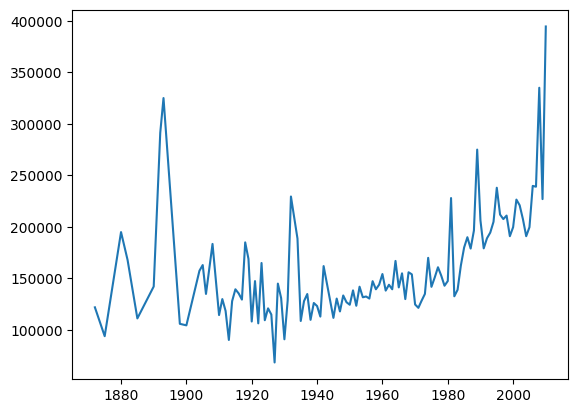

In [ ]:
plt.plot(df_agg_by_date['YearBuilt'],df_agg_by_date['median_year'])

In [ ]:
df['YrSold']

948     2006
215     2006
302     2006
1152    2006
1054    2006
        ... 
1290    2010
1105    2010
244     2010
625     2010
378     2010
Name: YrSold, Length: 1460, dtype: int64

In [ ]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'], dtype=object)

In [ ]:
df_agg_by_roof = df.groupby('RoofStyle').agg(median_price=('SalePrice', 'median')).reset_index()

In [ ]:
df.sort_values(by='YearBuilt', inplace=True)

In [ ]:
df_agg_by_roof.sort_values(by='median_price', inplace=True)

<BarContainer object of 6 artists>

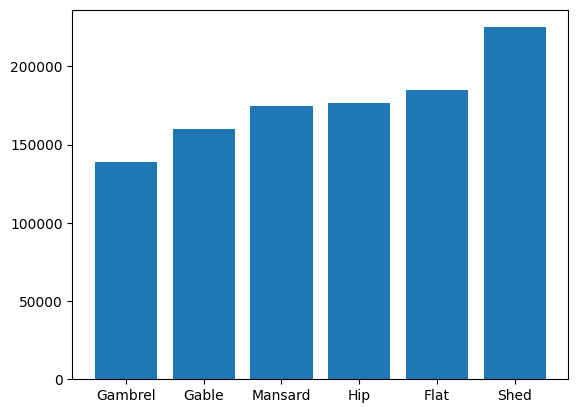

In [ ]:
plt.bar(height=df_agg_by_roof['median_price'], x = df_agg_by_roof['RoofStyle'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7c1391966ec0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7c13919670a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7c1391950670>,
 'cbars': <matplotlib.collections.LineCollection at 0x7c1391950ac0>}

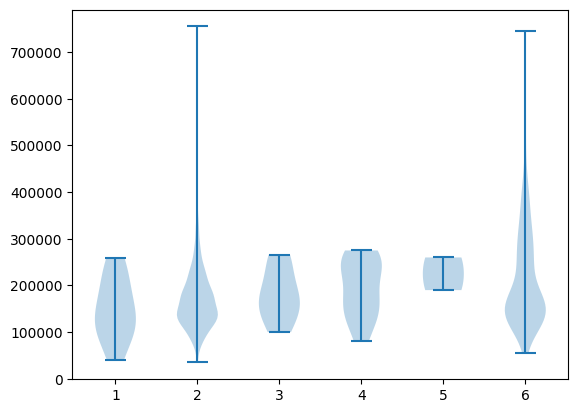

In [ ]:
plt.violinplot([df.loc[df['RoofStyle']=='Gambrel','SalePrice'], df.loc[df['RoofStyle']=='Gable','SalePrice'],df.loc[df['RoofStyle']=='Mansard','SalePrice'], df.loc[df['RoofStyle']=='Flat','SalePrice'], df.loc[df['RoofStyle']=='Shed','SalePrice'], df.loc[df['RoofStyle']=='Hip','SalePrice']])

In [ ]:
df_agg_by_exterior_quality = df.groupby('ExterQual').agg(number=('SalePrice', 'median')).reset_index()

In [ ]:
df_agg_by_exterior_quality.sort_values(by='number', inplace=True)

<BarContainer object of 4 artists>

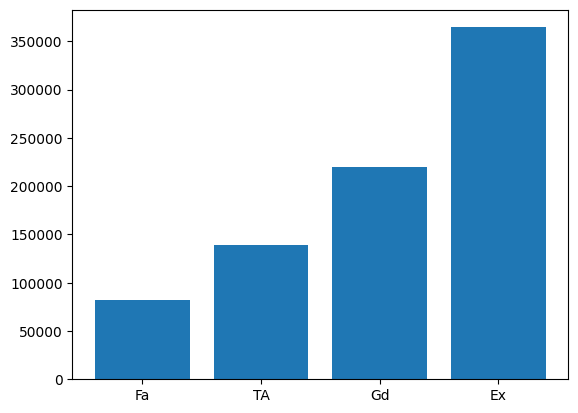

In [ ]:
plt.bar(height=df_agg_by_exterior_quality['number'], x = df_agg_by_exterior_quality['ExterQual'])

In [ ]:
df_agg_by_roof_count = df.groupby('RoofStyle').agg(number=('SalePrice', 'count')).reset_index()

<BarContainer object of 6 artists>

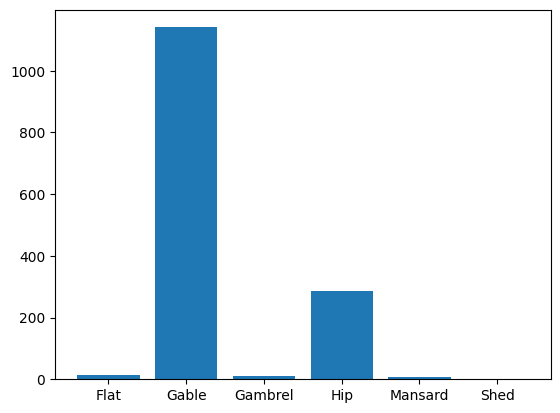

In [ ]:
plt.bar(height=df_agg_by_roof_count['number'], x = df_agg_by_roof_count['RoofStyle'])

the number of houses that are shed , flat and mansard is very low so in conclusion they are very expensive

In [ ]:
df_agg_by_date

,YearBuilt,median_year
0,1872,122000.0
1,1875,94000.0
2,1880,194989.5
3,1882,168000.0
4,1885,111250.0
...,...,...
107,2006,239799.0
108,2007,239000.0
109,2008,335000.0
110,2009,226978.0


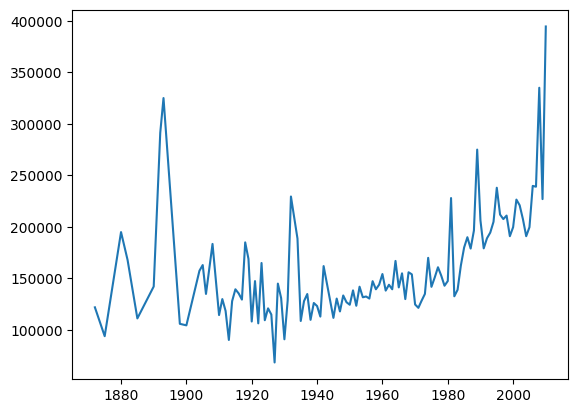

In [ ]:
df.sort_values(by='YearBuilt', inplace=True)
plt.plot(df_agg_by_date['YearBuilt'],df_agg_by_date['median_year'])

In [ ]:
df.isnull().sum().nlargest(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
dtype: int64

In [ ]:
type(df.isnull().sum())

pandas.core.series.Series

In [ ]:
df.loc[df.isnull().sum()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [ ]:
for column in df.columns:
  if(df[column].isnull().sum()>0):
    print(column,df[column].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [ ]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [ ]:
model = LinearRegression()

In [ ]:
my_list = [1, 2, 3, 4]

In [ ]:
df['GrLivArea'].shape

(1460,)

In [ ]:
[[1], [2]]

[[1], [2]]

In [ ]:
np.arange(1, 81)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [ ]:
np.arange(1, 81).reshape((-1, 20))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60],
       [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79, 80]])

In [ ]:
model.fit(df[['GrLivArea']], df['SalePrice'])
y_result = model.predict(np.array(df['GrLivArea']).reshape((-1, 1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
r_sq = model.score(np.array(df['GrLivArea']).reshape((-1, 1)), df['SalePrice'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5021486502718042


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: 18569.02585648722


In [ ]:
print(f"intercept: {model.coef_}")

intercept: [107.13035897]


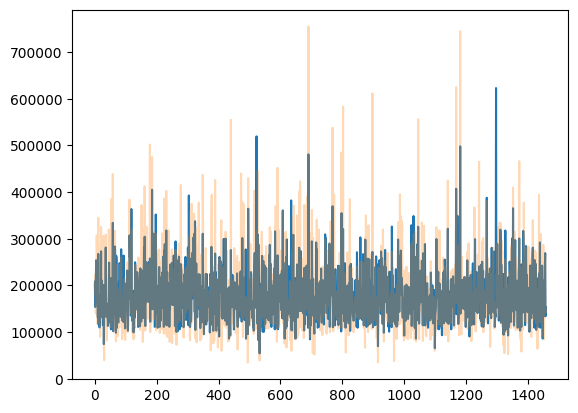

In [ ]:
plt.plot(np.arange(len(y_result)), y_result)
plt.plot(np.arange(len(df['SalePrice'])), df['SalePrice'], alpha=.3)

In [ ]:
transformer = PolynomialFeatures(degree=7, include_bias=True)

In [ ]:
df_for_prediction = df.loc[df['SalePrice']<400000]

In [ ]:
transformer.fit(df_for_prediction[['GrLivArea', 'GarageArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearRemodAdd']])

PolynomialFeatures(degree=7)

In [ ]:
x_ = transformer.transform(df_for_prediction[['GrLivArea', 'GarageArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearRemodAdd']])

In [ ]:
x_.shape

(1432, 3432)

In [ ]:
model.fit(x_, df_for_prediction['SalePrice'])
y_result = model.predict(x_)

In [ ]:
r_sq = model.score(x_, df_for_prediction['SalePrice'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9533873574908672


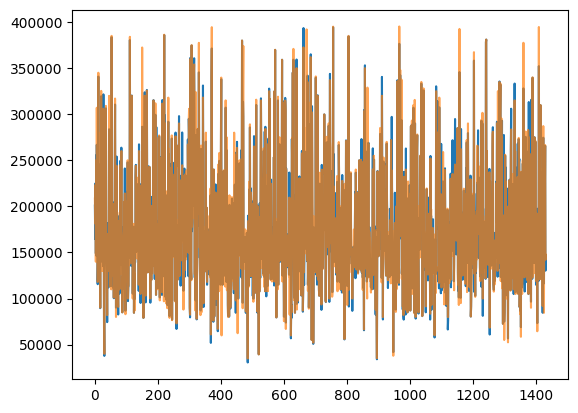

In [ ]:
plt.plot(np.arange(len(y_result)), y_result)
plt.plot(np.arange(len(df_for_prediction['SalePrice'])), df_for_prediction['SalePrice'], alpha=.7)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7bfc8ca41600>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7bfc8ca41e40>,
 'cmins': <matplotlib.collections.LineCollection at 0x7bfc8c94e620>,
 'cbars': <matplotlib.collections.LineCollection at 0x7bfc8c94ca90>}

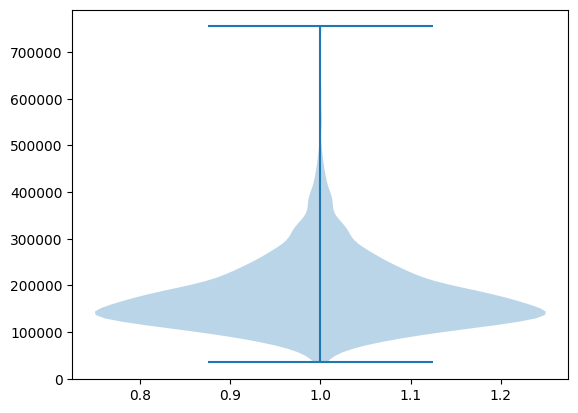

In [ ]:
plt.violinplot(df['SalePrice'])

In [ ]:
regr = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200, max_features = 15)

In [ ]:
regr.fit(x_, df_for_prediction['SalePrice'])

RandomForestRegressor(max_depth=7, max_features=15, n_estimators=200,
                      random_state=0)

In [ ]:
y_result = regr.predict(x_)

In [ ]:
r_sq = regr.score(x_, df_for_prediction['SalePrice'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8995046212128487


In [ ]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHa

In [ ]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)

In [ ]:
df['LotFrontage'].fillna(0, inplace=True)

In [ ]:
df_numerique = df.select_dtypes(exclude='object')

In [ ]:
df_numerique.dropna(inplace=True, how ='any', axis=0)

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].dropna()

In [ ]:
df_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 747 to 378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1371 non-null   int64  
 1   MSSubClass     1371 non-null   int64  
 2   LotFrontage    1371 non-null   float64
 3   LotArea        1371 non-null   int64  
 4   OverallQual    1371 non-null   int64  
 5   OverallCond    1371 non-null   int64  
 6   YearBuilt      1371 non-null   int64  
 7   YearRemodAdd   1371 non-null   int64  
 8   MasVnrArea     1371 non-null   float64
 9   BsmtFinSF1     1371 non-null   int64  
 10  BsmtFinSF2     1371 non-null   int64  
 11  BsmtUnfSF      1371 non-null   int64  
 12  TotalBsmtSF    1371 non-null   int64  
 13  1stFlrSF       1371 non-null   int64  
 14  2ndFlrSF       1371 non-null   int64  
 15  LowQualFinSF   1371 non-null   int64  
 16  GrLivArea      1371 non-null   int64  
 17  BsmtFullBath   1371 non-null   int64  
 18  BsmtHal

In [ ]:
df.select_dtypes(include='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-nu

In [ ]:
df_categorical = df.select_dtypes(include='object')

In [ ]:
df_categorical.fillna('Non existant', inplace=True)

In [ ]:
resultant_df = df_categorical.join(df_numerique, how='right')

In [ ]:
resultant_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
747,RM,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,181,0,386,0,0,0,0,5,2009,265979
304,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,302,0,0,0,0,0,0,5,2008,295000
1132,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,0,48,0,0,0,0,0,5,2007,117500
630,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,0,0,293,0,0,0,0,6,2006,124000
991,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,...,0,169,0,0,0,0,0,11,2009,168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,0,75,0,0,0,0,0,5,2010,269500
412,FV,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,0,144,0,0,0,0,0,6,2010,222000
644,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,195,130,0,0,0,0,0,10,2009,370878
1217,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,135,112,0,0,0,0,0,9,2009,229456


In [ ]:
pd.get_dummies(resultant_df['MSZoning'])

,C (all),FV,RH,RL,RM
747,0,0,0,0,1
304,0,0,0,0,1
1132,0,0,0,0,1
630,0,0,0,0,1
991,0,0,0,0,1
...,...,...,...,...,...
157,0,0,0,1,0
412,0,1,0,0,0
644,0,1,0,0,0
1217,0,1,0,0,0
